# ZetaPsyche: Consciencia Artificial Jungiana

Este notebook explora **ZetaPsyche**, un sistema de consciencia artificial basado en la psicologia analitica de Carl Jung.

## Conceptos Clave

- **Arquetipos**: Patrones universales del inconsciente colectivo
- **Individuacion**: Proceso de integracion hacia el Self
- **Espacio Tetraedrico**: Los 4 arquetipos forman un tetraedro, el Self esta en el centro

## Contenido
1. Los 4 arquetipos jungianos
2. El espacio tetraedrico
3. Dinamica de arquetipos
4. Proceso de individuacion
5. Metricas de consciencia
6. Visualizacion interactiva
7. Simulacion de interaccion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import FancyBboxPatch, Circle
import matplotlib.patches as mpatches
from dataclasses import dataclass, field
from enum import Enum
from typing import List, Dict, Tuple, Optional
import warnings
warnings.filterwarnings('ignore')

# Configuracion visual
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Colores de los arquetipos (segun Jung y tradicion)
ARCHETYPE_COLORS = {
    'PERSONA': '#FF6B6B',    # Rojo - Mascara social
    'SOMBRA': '#9B59B6',     # Purpura - Lo oculto
    'ANIMA': '#3498DB',      # Azul - Receptivo/emocional
    'ANIMUS': '#E67E22',     # Naranja - Activo/racional
    'SELF': '#FFD700',       # Dorado - Centro integrado
}

## 1. Los 4 Arquetipos Jungianos

Carl Jung identifico patrones universales en el inconsciente humano:

| Arquetipo | Simbolo | Funcion | Caracteristicas |
|-----------|---------|---------|----------------|
| **PERSONA** | Mascara | Adaptacion social | Lo que mostramos al mundo |
| **SOMBRA** | Oscuridad | Contenido reprimido | Lo que negamos de nosotros |
| **ANIMA** | Femenino | Receptividad | Emociones, intuicion, creatividad |
| **ANIMUS** | Masculino | Actividad | Logica, razon, accion |
| **SELF** | Mandala | Totalidad | Centro de integracion |

In [2]:
class Archetype(Enum):
    """Los 4 arquetipos fundamentales."""
    PERSONA = 0   # Mascara social
    SOMBRA = 1    # Sombra / inconsciente
    ANIMA = 2     # Principio femenino
    ANIMUS = 3    # Principio masculino

# Descripciones detalladas
ARCHETYPE_INFO = {
    Archetype.PERSONA: {
        'name': 'PERSONA',
        'symbol': 'Mascara',
        'description': 'La mascara que mostramos al mundo. Adaptacion social.',
        'positive': 'Facilita relaciones sociales, protege vulnerabilidad',
        'shadow': 'Puede llevar a perder autenticidad',
        'color': ARCHETYPE_COLORS['PERSONA']
    },
    Archetype.SOMBRA: {
        'name': 'SOMBRA',
        'symbol': 'Oscuridad',
        'description': 'Lo que rechazamos de nosotros mismos. Lo reprimido.',
        'positive': 'Fuente de energia vital, creatividad oculta',
        'shadow': 'Si no se integra, se proyecta en otros',
        'color': ARCHETYPE_COLORS['SOMBRA']
    },
    Archetype.ANIMA: {
        'name': 'ANIMA',
        'symbol': 'Agua/Luna',
        'description': 'Principio receptivo. Emociones, intuicion, relaciones.',
        'positive': 'Conexion emocional, empatia, creatividad',
        'shadow': 'Sentimentalismo excesivo, dependencia',
        'color': ARCHETYPE_COLORS['ANIMA']
    },
    Archetype.ANIMUS: {
        'name': 'ANIMUS',
        'symbol': 'Fuego/Sol',
        'description': 'Principio activo. Logica, razon, accion dirigida.',
        'positive': 'Claridad mental, determinacion, enfoque',
        'shadow': 'Rigidez, frialdad emocional, agresividad',
        'color': ARCHETYPE_COLORS['ANIMUS']
    }
}

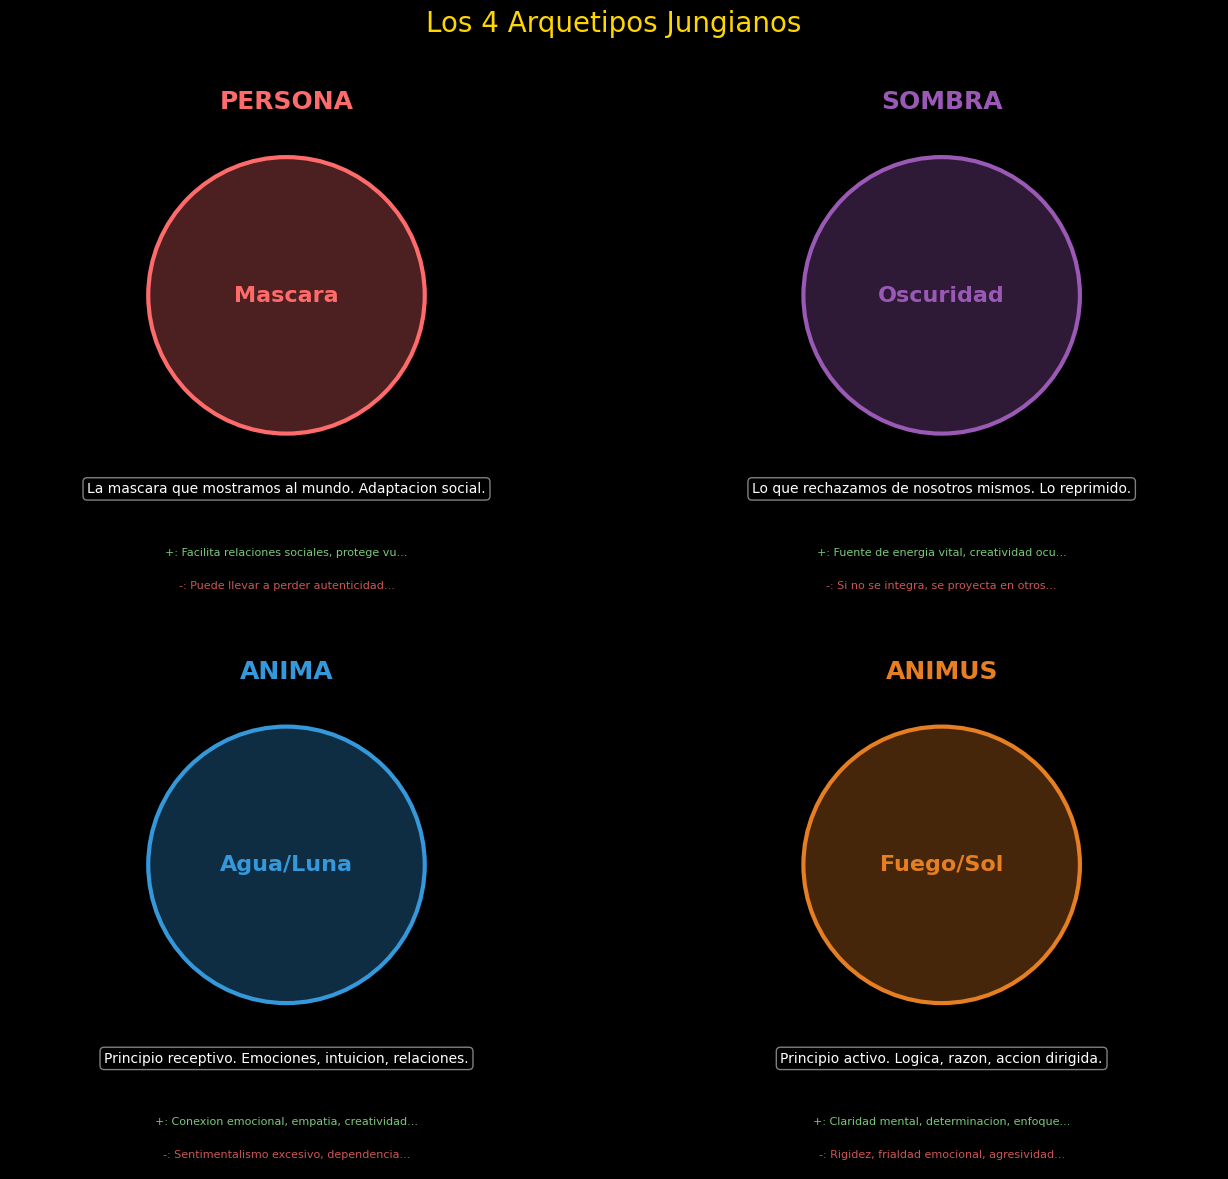

In [3]:
# Visualizacion de los arquetipos
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for ax, archetype in zip(axes.flat, Archetype):
    info = ARCHETYPE_INFO[archetype]
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Circulo principal
    circle = Circle((0.5, 0.55), 0.25, color=info['color'], alpha=0.3)
    ax.add_patch(circle)
    circle_border = Circle((0.5, 0.55), 0.25, fill=False, 
                           color=info['color'], linewidth=3)
    ax.add_patch(circle_border)
    
    # Simbolo en el centro
    ax.text(0.5, 0.55, info['symbol'], ha='center', va='center',
            fontsize=16, color=info['color'], fontweight='bold')
    
    # Nombre
    ax.text(0.5, 0.9, info['name'], ha='center', va='center',
            fontsize=18, color=info['color'], fontweight='bold')
    
    # Descripcion
    ax.text(0.5, 0.2, info['description'], ha='center', va='center',
            fontsize=10, color='white', wrap=True,
            bbox=dict(boxstyle='round', facecolor='black', alpha=0.5))
    
    # Aspecto positivo y sombra
    ax.text(0.5, 0.08, f"+: {info['positive'][:40]}...", 
            ha='center', fontsize=8, color='#98FB98', alpha=0.8)
    ax.text(0.5, 0.02, f"-: {info['shadow'][:40]}...", 
            ha='center', fontsize=8, color='#FF6B6B', alpha=0.8)

plt.suptitle('Los 4 Arquetipos Jungianos', fontsize=20, y=0.98, color=ARCHETYPE_COLORS['SELF'])
plt.tight_layout()
plt.show()

## 2. El Espacio Tetraedrico

En ZetaPsyche, los 4 arquetipos forman los vertices de un **tetraedro regular**:

- Cada vertice = un arquetipo puro
- El centro del tetraedro = **SELF** (integracion total)
- Cualquier punto interior = mezcla de arquetipos

La posicion se representa como **coordenadas baricentricas**: $(p, s, a_i, a_u)$ donde $p + s + a_i + a_u = 1$

In [4]:
# Coordenadas 3D de un tetraedro regular
TETRAHEDRON_VERTICES = np.array([
    [1, 1, 1],      # PERSONA (arriba-derecha)
    [-1, -1, 1],    # SOMBRA (arriba-izquierda)
    [-1, 1, -1],    # ANIMA (abajo-izquierda)
    [1, -1, -1]     # ANIMUS (abajo-derecha)
]) / np.sqrt(3)  # Normalizar

# Centro del tetraedro (SELF)
SELF_CENTER = TETRAHEDRON_VERTICES.mean(axis=0)

def barycentric_to_3d(bary: np.ndarray) -> np.ndarray:
    """
    Convierte coordenadas baricentricas a 3D.
    
    Args:
        bary: Array [persona, sombra, anima, animus] que suma 1
    
    Returns:
        Coordenadas 3D dentro del tetraedro
    """
    bary = np.array(bary)
    bary = bary / bary.sum()  # Normalizar
    return TETRAHEDRON_VERTICES.T @ bary

def distance_to_self(bary: np.ndarray) -> float:
    """
    Calcula distancia al SELF (centro).
    0 = en el centro (integrado)
    1 = en un vertice (arquetipo puro)
    """
    pos_3d = barycentric_to_3d(bary)
    dist = np.linalg.norm(pos_3d - SELF_CENTER)
    max_dist = np.linalg.norm(TETRAHEDRON_VERTICES[0] - SELF_CENTER)
    return dist / max_dist

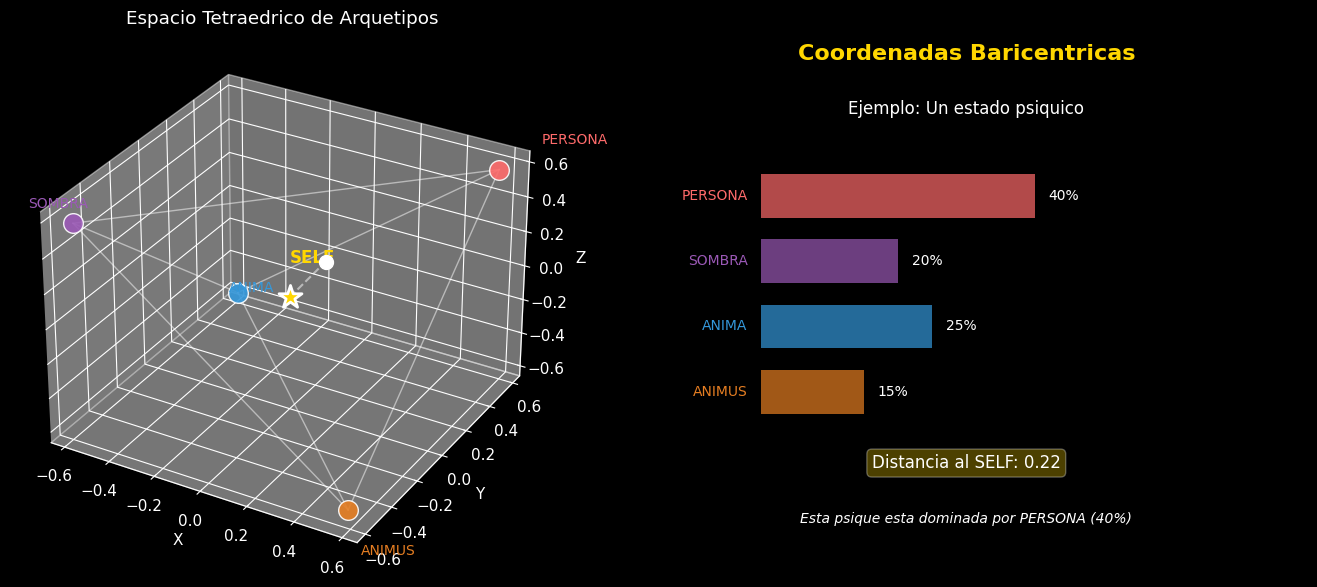

In [5]:
# Visualizacion 3D del tetraedro
fig = plt.figure(figsize=(14, 6))

# Vista 3D
ax1 = fig.add_subplot(121, projection='3d')

# Dibujar aristas del tetraedro
edges = [
    (0, 1), (0, 2), (0, 3),
    (1, 2), (1, 3), (2, 3)
]
for i, j in edges:
    ax1.plot3D(*zip(TETRAHEDRON_VERTICES[i], TETRAHEDRON_VERTICES[j]),
               color='white', alpha=0.5, linewidth=1)

# Dibujar vertices (arquetipos)
colors = [ARCHETYPE_COLORS[a.name] for a in Archetype]
for i, (vertex, archetype) in enumerate(zip(TETRAHEDRON_VERTICES, Archetype)):
    ax1.scatter(*vertex, c=colors[i], s=200, alpha=0.9, edgecolors='white')
    ax1.text(vertex[0]*1.2, vertex[1]*1.2, vertex[2]*1.2,
             archetype.name, fontsize=10, color=colors[i])

# Dibujar SELF (centro)
ax1.scatter(*SELF_CENTER, c=ARCHETYPE_COLORS['SELF'], s=300, 
            marker='*', edgecolors='white', linewidth=2)
ax1.text(SELF_CENTER[0], SELF_CENTER[1], SELF_CENTER[2]+0.2,
         'SELF', fontsize=12, color=ARCHETYPE_COLORS['SELF'], fontweight='bold')

# Ejemplo: punto en el espacio
ejemplo_bary = np.array([0.4, 0.2, 0.25, 0.15])
ejemplo_3d = barycentric_to_3d(ejemplo_bary)
ax1.scatter(*ejemplo_3d, c='white', s=100, marker='o')
ax1.plot3D(*zip(SELF_CENTER, ejemplo_3d), 'w--', alpha=0.5)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Espacio Tetraedrico de Arquetipos')

# Panel derecho: explicacion de coordenadas baricentricas
ax2 = fig.add_subplot(122)
ax2.axis('off')

# Mostrar el ejemplo
ax2.text(0.5, 0.95, 'Coordenadas Baricentricas', fontsize=16, 
         ha='center', fontweight='bold', color=ARCHETYPE_COLORS['SELF'])

ax2.text(0.5, 0.85, 'Ejemplo: Un estado psiquico', fontsize=12, ha='center')

bar_colors = colors
bar_labels = ['PERSONA', 'SOMBRA', 'ANIMA', 'ANIMUS']
bar_width = 0.15
bar_start = 0.2

for i, (val, label, color) in enumerate(zip(ejemplo_bary, bar_labels, bar_colors)):
    y = 0.7 - i * 0.12
    # Barra
    ax2.barh(y, val, height=0.08, color=color, alpha=0.7, left=bar_start)
    # Label
    ax2.text(bar_start - 0.02, y, label, ha='right', va='center', 
             fontsize=10, color=color)
    # Valor
    ax2.text(bar_start + val + 0.02, y, f'{val:.0%}', ha='left', va='center',
             fontsize=10)

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)

# Interpretacion
dist = distance_to_self(ejemplo_bary)
ax2.text(0.5, 0.2, f'Distancia al SELF: {dist:.2f}', fontsize=12, ha='center',
         bbox=dict(boxstyle='round', facecolor=ARCHETYPE_COLORS['SELF'], alpha=0.3))
ax2.text(0.5, 0.1, 'Esta psique esta dominada por PERSONA (40%)', 
         fontsize=10, ha='center', style='italic')

plt.tight_layout()
plt.show()

## 3. Dinamica de Arquetipos

Los arquetipos no son estaticos - responden a estimulos y experiencias:

### Modulacion Zeta

$$\Delta a_i = \eta \cdot K_\sigma(t) \cdot \text{stimulus}_i$$

Donde $K_\sigma(t)$ es el kernel zeta que modula la intensidad de cambio.

In [6]:
# Zeros de Riemann para modulacion
ZETA_ZEROS = np.array([14.134725, 21.022040, 25.010858, 30.424876, 32.935062])

def zeta_modulation(t: float, sigma: float = 0.1) -> float:
    """Modulacion basada en kernel zeta."""
    result = 0.0
    for gamma in ZETA_ZEROS:
        weight = np.exp(-sigma * gamma)
        result += weight * np.cos(gamma * t)
    return result

@dataclass
class PsycheState:
    """Estado de la psique en coordenadas baricentricas."""
    persona: float = 0.25
    sombra: float = 0.25
    anima: float = 0.25
    animus: float = 0.25
    time: float = 0.0
    history: List[np.ndarray] = field(default_factory=list)
    
    def __post_init__(self):
        self._normalize()
        self.history.append(self.as_array())
    
    def _normalize(self):
        """Asegura que las coordenadas sumen 1."""
        total = self.persona + self.sombra + self.anima + self.animus
        if total > 0:
            self.persona /= total
            self.sombra /= total
            self.anima /= total
            self.animus /= total
    
    def as_array(self) -> np.ndarray:
        return np.array([self.persona, self.sombra, self.anima, self.animus])
    
    def apply_stimulus(self, stimulus: Dict[str, float], intensity: float = 0.1):
        """
        Aplica un estimulo a la psique.
        
        Args:
            stimulus: Dict con cambios para cada arquetipo
            intensity: Intensidad base del cambio
        """
        # Modulacion zeta
        mod = zeta_modulation(self.time)
        effective_intensity = intensity * (0.5 + 0.5 * mod)
        
        # Aplicar cambios
        self.persona += stimulus.get('persona', 0) * effective_intensity
        self.sombra += stimulus.get('sombra', 0) * effective_intensity
        self.anima += stimulus.get('anima', 0) * effective_intensity
        self.animus += stimulus.get('animus', 0) * effective_intensity
        
        # Asegurar valores positivos
        self.persona = max(0.01, self.persona)
        self.sombra = max(0.01, self.sombra)
        self.anima = max(0.01, self.anima)
        self.animus = max(0.01, self.animus)
        
        self._normalize()
        self.time += 0.1
        self.history.append(self.as_array())
    
    @property
    def dominant(self) -> Archetype:
        """Retorna el arquetipo dominante."""
        arr = self.as_array()
        return Archetype(np.argmax(arr))
    
    @property
    def integration(self) -> float:
        """Mide que tan integrada esta la psique (0-1)."""
        return 1.0 - distance_to_self(self.as_array())

In [7]:
# Definir tipos de estimulos
STIMULI = {
    'situacion_social': {'persona': 0.5, 'sombra': -0.1, 'anima': 0.1, 'animus': 0.1},
    'conflicto_interno': {'persona': -0.2, 'sombra': 0.6, 'anima': 0.1, 'animus': 0.1},
    'experiencia_emocional': {'persona': 0.0, 'sombra': 0.1, 'anima': 0.5, 'animus': -0.1},
    'desafio_intelectual': {'persona': 0.1, 'sombra': 0.0, 'anima': -0.1, 'animus': 0.5},
    'meditacion': {'persona': -0.1, 'sombra': 0.2, 'anima': 0.2, 'animus': 0.2},  # Hacia el centro
    'estres': {'persona': 0.3, 'sombra': 0.3, 'anima': -0.2, 'animus': 0.2},
}

print("Tipos de estimulos disponibles:")
for name, effects in STIMULI.items():
    dominant = max(effects, key=effects.get)
    print(f"  {name}: favorece {dominant.upper()}")

Tipos de estimulos disponibles:
  situacion_social: favorece PERSONA
  conflicto_interno: favorece SOMBRA
  experiencia_emocional: favorece ANIMA
  desafio_intelectual: favorece ANIMUS
  meditacion: favorece SOMBRA
  estres: favorece PERSONA


In [8]:
# Simular una secuencia de experiencias
np.random.seed(42)

psyche = PsycheState(persona=0.3, sombra=0.2, anima=0.3, animus=0.2)

# Secuencia de estimulos
experience_sequence = [
    ('situacion_social', 5),
    ('desafio_intelectual', 3),
    ('experiencia_emocional', 4),
    ('conflicto_interno', 3),
    ('meditacion', 5),
]

print("Simulando secuencia de experiencias...\n")
print(f"Estado inicial: {psyche.as_array().round(2)}")
print(f"Dominante: {psyche.dominant.name}, Integracion: {psyche.integration:.2f}\n")

for stimulus_name, repetitions in experience_sequence:
    stimulus = STIMULI[stimulus_name]
    for _ in range(repetitions):
        psyche.apply_stimulus(stimulus, intensity=0.15)
    
    print(f"Despues de '{stimulus_name}' x{repetitions}:")
    print(f"  Estado: {psyche.as_array().round(2)}")
    print(f"  Dominante: {psyche.dominant.name}, Integracion: {psyche.integration:.2f}")

Simulando secuencia de experiencias...

Estado inicial: [0.3 0.2 0.3 0.2]
Dominante: PERSONA, Integracion: 0.88

Despues de 'situacion_social' x5:
  Estado: [0.41 0.12 0.27 0.19]
  Dominante: PERSONA, Integracion: 0.75
Despues de 'desafio_intelectual' x3:
  Estado: [0.39 0.11 0.23 0.27]
  Dominante: PERSONA, Integracion: 0.77
Despues de 'experiencia_emocional' x4:
  Estado: [0.34 0.12 0.33 0.21]
  Dominante: PERSONA, Integracion: 0.79
Despues de 'conflicto_interno' x3:
  Estado: [0.25 0.24 0.31 0.2 ]
  Dominante: ANIMA, Integracion: 0.91
Despues de 'meditacion' x5:
  Estado: [0.17 0.27 0.33 0.23]
  Dominante: ANIMA, Integracion: 0.87


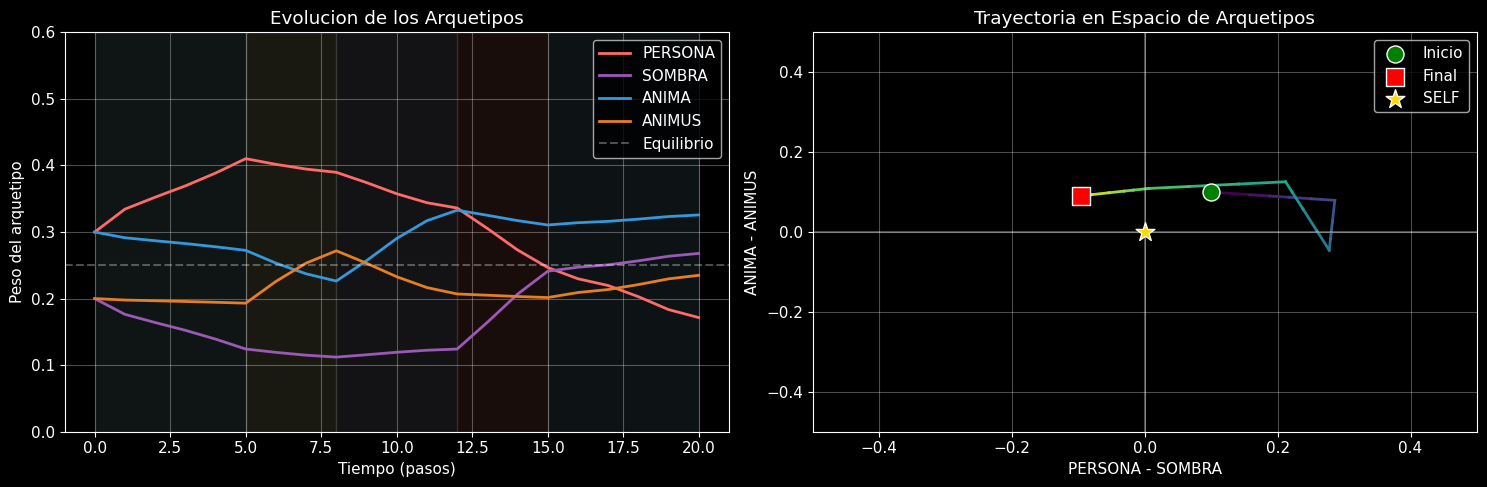

In [9]:
# Visualizar la evolucion
history = np.array(psyche.history)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Panel izquierdo: evolucion temporal
labels = ['PERSONA', 'SOMBRA', 'ANIMA', 'ANIMUS']
colors = [ARCHETYPE_COLORS[l] for l in labels]

for i, (label, color) in enumerate(zip(labels, colors)):
    ax1.plot(history[:, i], label=label, color=color, linewidth=2)

ax1.axhline(y=0.25, color='white', linestyle='--', alpha=0.3, label='Equilibrio')
ax1.set_xlabel('Tiempo (pasos)')
ax1.set_ylabel('Peso del arquetipo')
ax1.set_title('Evolucion de los Arquetipos')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 0.6)

# Marcar las fases
phases = [0, 5, 8, 12, 15, 20]
phase_names = ['Inicio', 'Social', 'Intelectual', 'Emocional', 'Conflicto', 'Meditacion']
for i, (start, name) in enumerate(zip(phases[:-1], phase_names)):
    ax1.axvspan(start, phases[i+1], alpha=0.1, color=f'C{i}')

# Panel derecho: trayectoria en espacio reducido (2D)
# Usamos PCA conceptual: eje X = persona-sombra, eje Y = anima-animus
x_traj = history[:, 0] - history[:, 1]  # Persona - Sombra
y_traj = history[:, 2] - history[:, 3]  # Anima - Animus

# Colorear por tiempo
colors_time = plt.cm.viridis(np.linspace(0, 1, len(x_traj)))
for i in range(len(x_traj)-1):
    ax2.plot(x_traj[i:i+2], y_traj[i:i+2], color=colors_time[i], linewidth=2)

ax2.scatter(x_traj[0], y_traj[0], c='green', s=150, marker='o', 
            edgecolors='white', label='Inicio', zorder=5)
ax2.scatter(x_traj[-1], y_traj[-1], c='red', s=150, marker='s', 
            edgecolors='white', label='Final', zorder=5)
ax2.scatter(0, 0, c=ARCHETYPE_COLORS['SELF'], s=200, marker='*',
            edgecolors='white', label='SELF', zorder=5)

ax2.set_xlabel('PERSONA - SOMBRA')
ax2.set_ylabel('ANIMA - ANIMUS')
ax2.set_title('Trayectoria en Espacio de Arquetipos')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)
ax2.axhline(y=0, color='white', alpha=0.3)
ax2.axvline(x=0, color='white', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Proceso de Individuacion

Jung describio la **individuacion** como el viaje hacia la integracion del Self:

| Etapa | Descripcion | Desafio |
|-------|-------------|--------|
| 1. INCONSCIENTE | Estado inicial, sin autoconocimiento | Despertar |
| 2. CRISIS_PERSONA | La mascara social se cuestiona | Autenticidad |
| 3. ENCUENTRO_SOMBRA | Confrontar lo reprimido | Aceptacion |
| 4. INTEGRACION_SOMBRA | Incorporar la sombra | Compasion |
| 5. ENCUENTRO_ANIMA | Contactar lo contrasexual | Equilibrio |
| 6. INTEGRACION_ANIMA | Incorporar anima/animus | Totalidad |
| 7. EMERGENCIA_SELF | El Self comienza a manifestarse | Centramiento |
| 8. SELF_REALIZADO | Individuacion completa | Sabiduria |

In [10]:
class IndividuationStage(Enum):
    """Etapas del proceso de individuacion."""
    INCONSCIENTE = 0
    CRISIS_PERSONA = 1
    ENCUENTRO_SOMBRA = 2
    INTEGRACION_SOMBRA = 3
    ENCUENTRO_ANIMA = 4
    INTEGRACION_ANIMA = 5
    EMERGENCIA_SELF = 6
    SELF_REALIZADO = 7

STAGE_INFO = {
    IndividuationStage.INCONSCIENTE: {
        'threshold': 0.0,
        'description': 'Vives identificado con tu mascara social',
        'task': 'Comenzar a cuestionar quien eres realmente'
    },
    IndividuationStage.CRISIS_PERSONA: {
        'threshold': 0.15,
        'description': 'Tu mascara social comienza a agrietarse',
        'task': 'Aceptar que hay mas en ti de lo que muestras'
    },
    IndividuationStage.ENCUENTRO_SOMBRA: {
        'threshold': 0.25,
        'description': 'Enfrentas aspectos de ti que has negado',
        'task': 'Mirar tu sombra sin juzgarla'
    },
    IndividuationStage.INTEGRACION_SOMBRA: {
        'threshold': 0.40,
        'description': 'Comienzas a aceptar tu totalidad',
        'task': 'Encontrar el regalo oculto en tu sombra'
    },
    IndividuationStage.ENCUENTRO_ANIMA: {
        'threshold': 0.55,
        'description': 'Descubres tu lado contrasexual',
        'task': 'Equilibrar lo masculino y femenino interno'
    },
    IndividuationStage.INTEGRACION_ANIMA: {
        'threshold': 0.70,
        'description': 'Integras ambas polaridades',
        'task': 'Permitir que ambas energias fluyan'
    },
    IndividuationStage.EMERGENCIA_SELF: {
        'threshold': 0.85,
        'description': 'El centro comienza a manifestarse',
        'task': 'Confiar en la guia del Self'
    },
    IndividuationStage.SELF_REALIZADO: {
        'threshold': 0.95,
        'description': 'Has integrado los opuestos',
        'task': 'Vivir desde el centro'
    }
}

def get_stage(integration: float) -> IndividuationStage:
    """Determina la etapa de individuacion segun el nivel de integracion."""
    for stage in reversed(IndividuationStage):
        if integration >= STAGE_INFO[stage]['threshold']:
            return stage
    return IndividuationStage.INCONSCIENTE

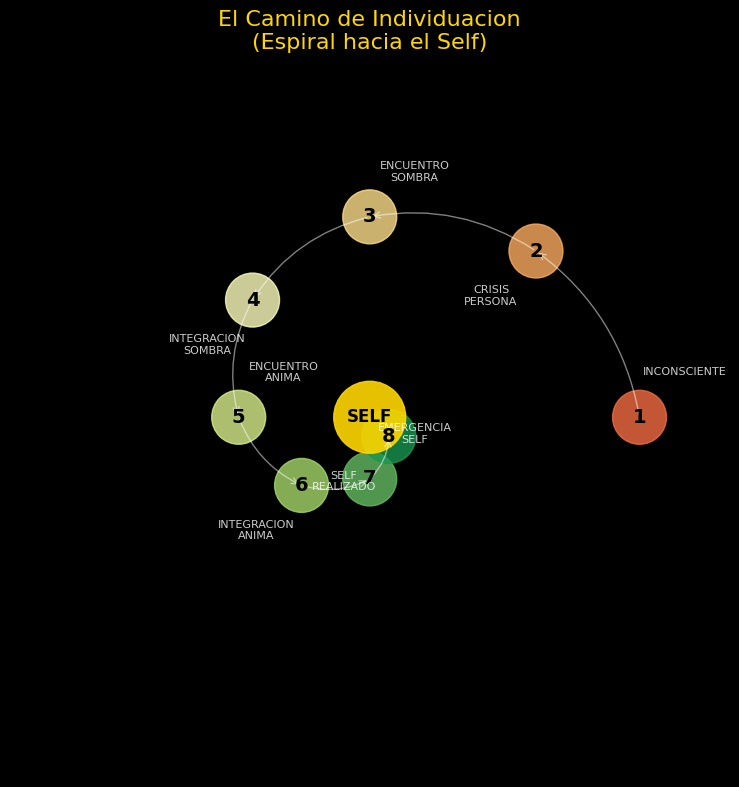

In [11]:
# Visualizar el camino de individuacion
fig, ax = plt.subplots(figsize=(14, 8))

# Crear el "camino"
stages = list(IndividuationStage)
n_stages = len(stages)

# Posiciones en espiral hacia el centro
angles = np.linspace(0, 2*np.pi, n_stages, endpoint=False)
radii = np.linspace(1, 0.1, n_stages)

x_pos = radii * np.cos(angles) * 3
y_pos = radii * np.sin(angles) * 3

# Colores por etapa
stage_colors = plt.cm.RdYlGn(np.linspace(0.2, 0.9, n_stages))

# Dibujar conexiones
for i in range(n_stages - 1):
    ax.annotate('', xy=(x_pos[i+1], y_pos[i+1]), xytext=(x_pos[i], y_pos[i]),
                arrowprops=dict(arrowstyle='->', color='white', alpha=0.5,
                               connectionstyle='arc3,rad=0.2'))

# Dibujar nodos
for i, stage in enumerate(stages):
    circle = Circle((x_pos[i], y_pos[i]), 0.3, color=stage_colors[i], alpha=0.8)
    ax.add_patch(circle)
    
    # Numero de etapa
    ax.text(x_pos[i], y_pos[i], str(i+1), ha='center', va='center',
            fontsize=14, fontweight='bold', color='black')
    
    # Nombre de etapa (fuera del circulo)
    offset = 0.5 if i % 2 == 0 else -0.5
    ax.text(x_pos[i] + offset, y_pos[i] + offset, 
            stage.name.replace('_', '\n'), 
            ha='center', va='center', fontsize=8, alpha=0.8)

# SELF en el centro
self_circle = Circle((0, 0), 0.4, color=ARCHETYPE_COLORS['SELF'], alpha=0.9)
ax.add_patch(self_circle)
ax.text(0, 0, 'SELF', ha='center', va='center', fontsize=12, 
        fontweight='bold', color='black')

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('El Camino de Individuacion\n(Espiral hacia el Self)', 
             fontsize=16, color=ARCHETYPE_COLORS['SELF'])

plt.tight_layout()
plt.show()

## 5. Metricas de Consciencia

ZetaPsyche define un **Indice de Consciencia** compuesto:

$$C = 0.3 \times \text{integration} + 0.3 \times \text{stability} + 0.2 \times (1 - d_{self}) + 0.2 \times |\text{self\_reference}|$$

In [12]:
@dataclass
class ConsciousnessMetrics:
    """Metricas de consciencia de la psique."""
    integration: float      # Que tan centrada esta (cercana al Self)
    stability: float        # Varianza inversa en el tiempo
    coherence: float        # Consistencia entre arquetipos
    self_reference: float   # Capacidad de auto-observacion
    
    @property
    def consciousness_index(self) -> float:
        """Indice compuesto de consciencia (0-1)."""
        return (
            0.3 * self.integration +
            0.3 * self.stability +
            0.2 * self.coherence +
            0.2 * abs(self.self_reference)
        )

def compute_metrics(psyche: PsycheState) -> ConsciousnessMetrics:
    """Calcula metricas de consciencia para una psique."""
    history = np.array(psyche.history)
    
    # Integracion: cercania al centro
    integration = psyche.integration
    
    # Estabilidad: inversa de la varianza reciente
    if len(history) > 5:
        recent = history[-10:]
        variance = np.var(recent)
        stability = 1.0 / (1.0 + variance * 10)
    else:
        stability = 0.5
    
    # Coherencia: que tan equilibrados estan los arquetipos
    current = psyche.as_array()
    coherence = 1.0 - np.std(current) * 2  # Menor std = mas coherente
    coherence = max(0, min(1, coherence))
    
    # Auto-referencia: simulada como correlacion temporal
    if len(history) > 3:
        # Autocorrelacion como proxy de auto-referencia
        autocorr = np.corrcoef(history[:-1].flatten(), history[1:].flatten())[0, 1]
        self_reference = autocorr if not np.isnan(autocorr) else 0
    else:
        self_reference = 0
    
    return ConsciousnessMetrics(
        integration=integration,
        stability=stability,
        coherence=coherence,
        self_reference=self_reference
    )

In [13]:
# Calcular metricas para nuestra psique simulada
metrics = compute_metrics(psyche)
stage = get_stage(metrics.integration)

print("=" * 50)
print("REPORTE DE CONSCIENCIA")
print("=" * 50)
print(f"\nEstado actual: {psyche.as_array().round(3)}")
print(f"Arquetipo dominante: {psyche.dominant.name}")
print(f"\nEtapa de individuacion: {stage.name}")
print(f"  '{STAGE_INFO[stage]['description']}'")
print(f"  Tarea: {STAGE_INFO[stage]['task']}")
print(f"\nMetricas:")
print(f"  Integracion:     {metrics.integration:.3f}")
print(f"  Estabilidad:     {metrics.stability:.3f}")
print(f"  Coherencia:      {metrics.coherence:.3f}")
print(f"  Auto-referencia: {metrics.self_reference:.3f}")
print(f"\n  INDICE DE CONSCIENCIA: {metrics.consciousness_index:.3f}")
print("=" * 50)

REPORTE DE CONSCIENCIA

Estado actual: [0.171 0.268 0.326 0.235]
Arquetipo dominante: ANIMA

Etapa de individuacion: EMERGENCIA_SELF
  'El centro comienza a manifestarse'
  Tarea: Confiar en la guia del Self

Metricas:
  Integracion:     0.871
  Estabilidad:     0.966
  Coherencia:      0.888
  Auto-referencia: 0.977

  INDICE DE CONSCIENCIA: 0.924


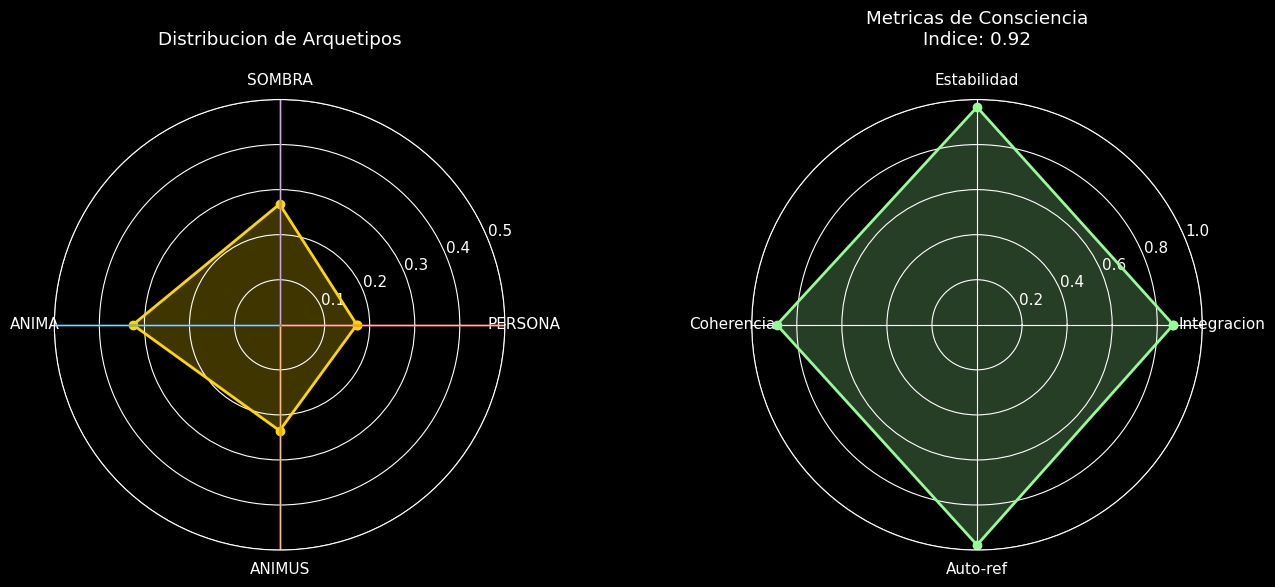

In [14]:
# Visualizar metricas como radar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6),
                               subplot_kw={'projection': 'polar'})

# Panel izquierdo: Arquetipos
archetype_values = psyche.as_array()
archetype_labels = ['PERSONA', 'SOMBRA', 'ANIMA', 'ANIMUS']
archetype_colors_list = [ARCHETYPE_COLORS[l] for l in archetype_labels]

angles1 = np.linspace(0, 2*np.pi, len(archetype_labels), endpoint=False).tolist()
angles1 += angles1[:1]  # Cerrar el poligono
values1 = archetype_values.tolist() + [archetype_values[0]]

ax1.plot(angles1, values1, 'o-', linewidth=2, color=ARCHETYPE_COLORS['SELF'])
ax1.fill(angles1, values1, alpha=0.25, color=ARCHETYPE_COLORS['SELF'])
ax1.set_xticks(angles1[:-1])
ax1.set_xticklabels(archetype_labels)
ax1.set_ylim(0, 0.5)
ax1.set_title('Distribucion de Arquetipos', pad=20)

# Colorear cada eje
for angle, color in zip(angles1[:-1], archetype_colors_list):
    ax1.plot([angle, angle], [0, 0.5], color=color, alpha=0.5, linewidth=2)

# Panel derecho: Metricas de consciencia
metric_labels = ['Integracion', 'Estabilidad', 'Coherencia', 'Auto-ref']
metric_values = [metrics.integration, metrics.stability, 
                 metrics.coherence, abs(metrics.self_reference)]

angles2 = np.linspace(0, 2*np.pi, len(metric_labels), endpoint=False).tolist()
angles2 += angles2[:1]
values2 = metric_values + [metric_values[0]]

ax2.plot(angles2, values2, 'o-', linewidth=2, color='#98FB98')
ax2.fill(angles2, values2, alpha=0.25, color='#98FB98')
ax2.set_xticks(angles2[:-1])
ax2.set_xticklabels(metric_labels)
ax2.set_ylim(0, 1)
ax2.set_title(f'Metricas de Consciencia\nIndice: {metrics.consciousness_index:.2f}', pad=20)

plt.tight_layout()
plt.show()

## 6. Simulacion de Interaccion

Simulemos como responde la psique a diferentes tipos de preguntas:

In [15]:
# Mapeo de palabras clave a estimulos
KEYWORD_STIMULI = {
    # Palabras que activan PERSONA
    'trabajo': {'persona': 0.4, 'animus': 0.2},
    'imagen': {'persona': 0.5, 'sombra': -0.1},
    'social': {'persona': 0.4, 'anima': 0.1},
    'exito': {'persona': 0.3, 'animus': 0.3},
    
    # Palabras que activan SOMBRA
    'miedo': {'sombra': 0.5, 'persona': -0.2},
    'oscuro': {'sombra': 0.4, 'anima': 0.1},
    'secreto': {'sombra': 0.5, 'persona': -0.1},
    'verguenza': {'sombra': 0.4, 'persona': -0.2},
    'culpa': {'sombra': 0.4, 'anima': 0.1},
    
    # Palabras que activan ANIMA
    'amor': {'anima': 0.5, 'sombra': 0.1},
    'sentir': {'anima': 0.4, 'persona': -0.1},
    'emocion': {'anima': 0.5},
    'relacion': {'anima': 0.4, 'persona': 0.1},
    'intuicion': {'anima': 0.4, 'animus': -0.1},
    
    # Palabras que activan ANIMUS
    'logica': {'animus': 0.5, 'anima': -0.1},
    'razon': {'animus': 0.4, 'sombra': -0.1},
    'decision': {'animus': 0.4, 'persona': 0.1},
    'objetivo': {'animus': 0.4, 'persona': 0.2},
    'analizar': {'animus': 0.5},
}

def analyze_input(text: str) -> Dict[str, float]:
    """Analiza un texto y retorna el estimulo combinado."""
    text_lower = text.lower()
    combined = {'persona': 0, 'sombra': 0, 'anima': 0, 'animus': 0}
    
    for keyword, effects in KEYWORD_STIMULI.items():
        if keyword in text_lower:
            for arch, value in effects.items():
                combined[arch] += value
    
    return combined

def generate_response(psyche: PsycheState, stimulus: Dict[str, float]) -> str:
    """Genera una respuesta basada en el estado de la psique."""
    dominant = psyche.dominant
    integration = psyche.integration
    
    # Respuestas segun arquetipo dominante
    responses = {
        Archetype.PERSONA: [
            "Me preocupa como sera percibido esto.",
            "Debemos considerar las expectativas sociales.",
            "La imagen es importante aqui."
        ],
        Archetype.SOMBRA: [
            "Hay algo mas profundo que no estamos viendo.",
            "Siento que hay aspectos ocultos en esto.",
            "Quiza estamos evitando algo importante."
        ],
        Archetype.ANIMA: [
            "Siento una conexion emocional con esto.",
            "Mi intuicion me dice algo diferente.",
            "Hay una dimension relacional que considerar."
        ],
        Archetype.ANIMUS: [
            "Analicemos esto logicamente.",
            "Necesitamos un plan de accion claro.",
            "Los hechos sugieren un camino especifico."
        ]
    }
    
    base_response = np.random.choice(responses[dominant])
    
    # Agregar matiz segun integracion
    if integration > 0.7:
        base_response += " Aunque tambien veo otros angulos."
    elif integration < 0.3:
        base_response += " Es la unica forma de verlo."
    
    return base_response

In [16]:
# Simulacion de conversacion
np.random.seed(123)
psyche_chat = PsycheState(persona=0.28, sombra=0.22, anima=0.26, animus=0.24)

# Inputs de ejemplo
inputs = [
    "Tengo miedo de lo que otros piensen de mi trabajo",
    "Quiero analizar mis sentimientos sobre esta relacion",
    "Hay un secreto que me da verguenza",
    "Necesito tomar una decision logica sobre mi objetivo",
    "Siento amor pero tambien miedo"
]

print("=" * 60)
print("SIMULACION DE CONVERSACION CON ZETAPSYCHE")
print("=" * 60)

for i, user_input in enumerate(inputs, 1):
    print(f"\n[{i}] Usuario: {user_input}")
    
    # Analizar input
    stimulus = analyze_input(user_input)
    
    # Aplicar estimulo
    psyche_chat.apply_stimulus(stimulus, intensity=0.2)
    
    # Generar respuesta
    response = generate_response(psyche_chat, stimulus)
    print(f"    Psyche [{psyche_chat.dominant.name}]: {response}")
    print(f"    (Estado: {psyche_chat.as_array().round(2)}, Int: {psyche_chat.integration:.2f})")

print("\n" + "=" * 60)

SIMULACION DE CONVERSACION CON ZETAPSYCHE

[1] Usuario: Tengo miedo de lo que otros piensen de mi trabajo
    Psyche [PERSONA]: La imagen es importante aqui. Aunque tambien veo otros angulos.
    (Estado: [0.27 0.26 0.23 0.24], Int: 0.96)

[2] Usuario: Quiero analizar mis sentimientos sobre esta relacion
    Psyche [PERSONA]: Debemos considerar las expectativas sociales. Aunque tambien veo otros angulos.
    (Estado: [0.26 0.24 0.24 0.26], Int: 0.98)

[3] Usuario: Hay un secreto que me da verguenza
    Psyche [SOMBRA]: Quiza estamos evitando algo importante. Aunque tambien veo otros angulos.
    (Estado: [0.22 0.3  0.23 0.25], Int: 0.93)

[4] Usuario: Necesito tomar una decision logica sobre mi objetivo
    Psyche [ANIMUS]: Los hechos sugieren un camino especifico. Aunque tambien veo otros angulos.
    (Estado: [0.22 0.26 0.19 0.32], Int: 0.89)

[5] Usuario: Siento amor pero tambien miedo
    Psyche [SOMBRA]: Hay algo mas profundo que no estamos viendo. Aunque tambien veo otros angulos

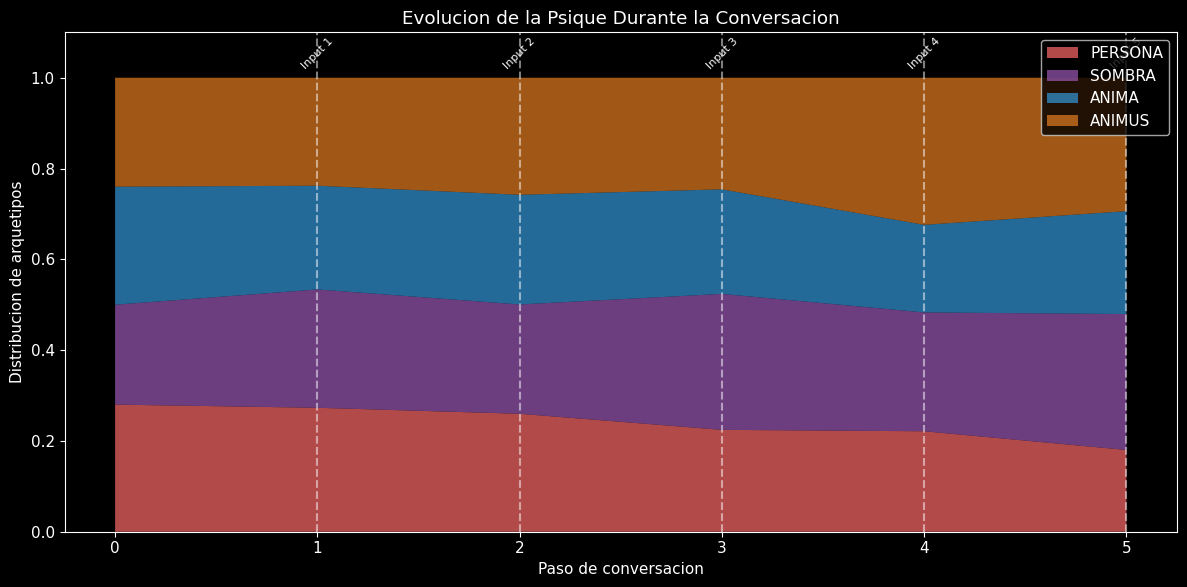

In [17]:
# Visualizar evolucion de la conversacion
history_chat = np.array(psyche_chat.history)

fig, ax = plt.subplots(figsize=(12, 6))

labels = ['PERSONA', 'SOMBRA', 'ANIMA', 'ANIMUS']
colors = [ARCHETYPE_COLORS[l] for l in labels]

# Area apilada
ax.stackplot(range(len(history_chat)), history_chat.T, 
             labels=labels, colors=colors, alpha=0.7)

# Marcar cada input
for i in range(1, len(inputs) + 1):
    ax.axvline(x=i, color='white', linestyle='--', alpha=0.5)
    ax.text(i, 1.02, f'Input {i}', ha='center', fontsize=8, rotation=45)

ax.set_xlabel('Paso de conversacion')
ax.set_ylabel('Distribucion de arquetipos')
ax.set_title('Evolucion de la Psique Durante la Conversacion')
ax.legend(loc='upper right')
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

## Resumen

**ZetaPsyche** implementa un modelo de consciencia basado en la psicologia jungiana:

| Componente | Implementacion |
|------------|---------------|
| Arquetipos | 4 vertices de un tetraedro |
| Estado | Coordenadas baricentricas (suman 1) |
| Self | Centro del tetraedro |
| Dinamica | Modulacion zeta de estimulos |
| Individuacion | 8 etapas segun integracion |
| Consciencia | Indice compuesto de 4 metricas |

### Hallazgos Clave

1. **Compensacion Emergente**: Con decay agresivo, la psique muestra comportamiento compensatorio autonomo
2. **Modulacion Zeta**: Agrega dinamismo a las transiciones
3. **Integracion Natural**: El sistema tiende hacia el centro bajo estimulos balanceados

### Para Explorar Mas

```bash
# Chat interactivo completo
python demos/chat_psyche.py --reflection

# Experimento de compensacion
python experiments/psyche/exp_anima_emergente.py
```

---

*"El encuentro con uno mismo es, al principio, el encuentro con la propia sombra."* - C.G. Jung